# Table of Contents

01. Importing libraries
02. Importing data
03. Data cleaning
04. Data prep for regression analysis 
05. Regression analysis
    1) Entire df
    2) City hotel df
    3) Resort hotel df

## 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## 02. Importing data

In [3]:
# create a variable to store the main project folder path

path=r'/Users/tejas/Documents/CareerFoundry_DataAnalytics/Data Immersion/A6/Hotel Booking'

In [4]:
# import the cleaned data set

df=pd.read_pickle(os.path.join(path,'Data','Prepared Data','hotel_booking_cleaned.pkl'))

## 03. Data cleaning

In [5]:
df.head()

,hotel,is_canceled,lead_time,cancellation_percent,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,32.56,2015,July,27,1,0,0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,69,34.82,2015,July,27,1,0,0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,12.75,2015,July,27,1,0,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,20.26,2015,July,27,1,0,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,21.43,2015,July,27,1,0,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.shape

(86916, 31)

In [115]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'cancellation_percent',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'kids', 'guest_type', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [203]:
# Check for missing values

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
cancellation_percent              0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
kids                              0
guest_type                        0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [207]:
# check for duplicates

sum(df.duplicated())

0

#### Will check for extreme values in 'lead_time' since the dependent variable 'cancellation_rate' is derived from the independent variable 'lead_time' and the categorical variable 'is_canceled' 

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

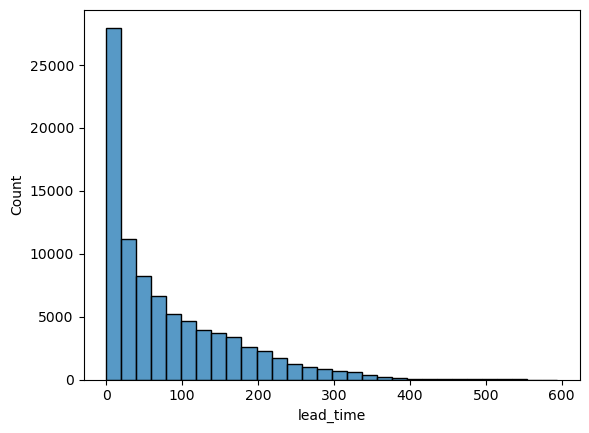

In [68]:
# extreme value check

sns.histplot(df['lead_time'], bins=30)

In [217]:
df['lead_time'].mean() # Check the mean

79.7962170371393

In [218]:
df['lead_time'].median() # Check the median

49.0

In [219]:
df['lead_time'].max() # Check the max

594

### Hypothesis: The longer the lead time, the more likely the booking is to be cancelled.

## 04. Data prep for regression analysis 

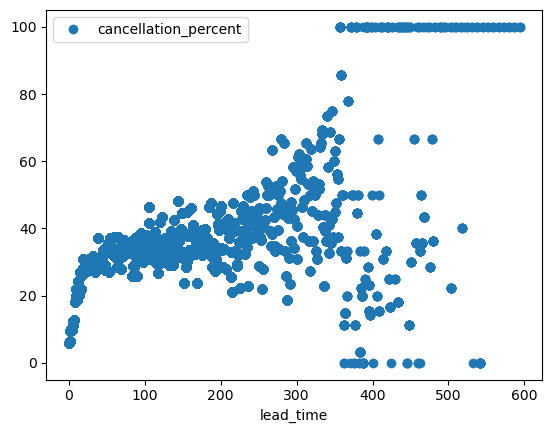

In [11]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'lead_time', y='cancellation_rate',style='o') # The style option creates a scatterplot; without it, we only have lines. 
plt.show()

In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['lead_time'].values.reshape(-1,1)
y = df['cancellation_rate'].values.reshape(-1,1)

In [13]:
X

array([[342],
       [ 69],
       [  7],
       ...,
       [ 34],
       [109],
       [205]])

In [14]:
y

array([[32.56],
       [34.82],
       [12.75],
       ...,
       [27.03],
       [35.43],
       [41.9 ]])

In [15]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 05. Regression analysis

In [16]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [17]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

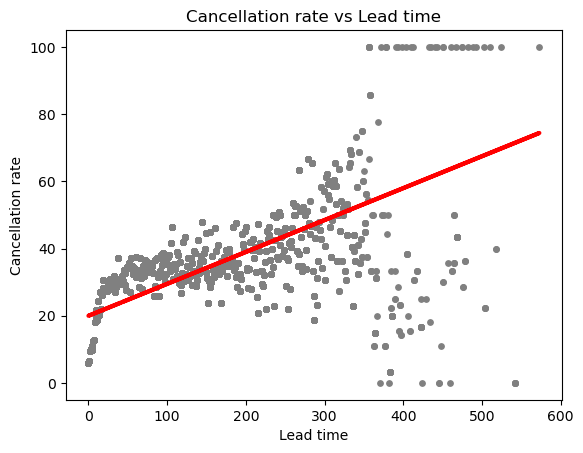

In [220]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cancellation rate vs Lead time')
plot_test.xlabel('Lead time')
plot_test.ylabel('Cancellation rate')
plot_test.show()

#### As the lead time increases, there is an overall increase and at times greater than proportionate increase in the cancellation rate. However, once the lead time crosses 340 days, there is some variance in the data. Some data points from the middle portion start to scatter in the lower band, indicating low cancellation rate, and contradicting the hypothesis in a way. Although for most part, the line fits the data, thereby indicating a linear relationship.

In [20]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [21]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.09495893]]
Mean squared error:  79.96192860861052
R2 score:  0.4572970083881459


#### The slope of 0.09 indicates a positive relationship. That is, as the lead time increases, the cancellation rate increases at a degree of 0.09
#### The MSE of 79.96 is slightly large.
#### The R2 score of 0.457 is roughly 46%, indicating a model of moderate fit.

In [22]:
y_predicted

array([[24.25333947],
       [30.90046456],
       [21.4995305 ],
       ...,
       [32.89460209],
       [27.67186094],
       [23.68358589]])

In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,33.63,24.253339
1,29.79,30.900465
2,21.90,21.499530
3,37.47,25.677723
4,31.64,35.173616
5,21.90,21.499530
6,28.40,22.923914
7,34.56,24.633175
8,12.75,20.644900
9,36.51,28.051697


#### There’s quite the difference between the actual and predicted y values.

### Compare how the regression fits the training set

In [24]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.09495893]]
Mean squared error:  78.49432150130457
R2 score:  0.4588369117471427


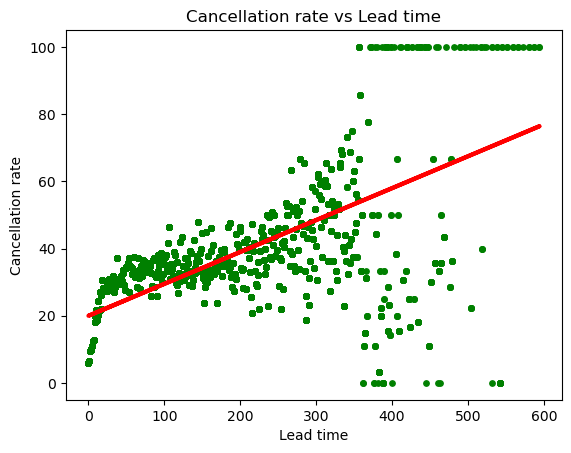

In [221]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cancellation rate vs Lead time')
plot_test.xlabel('Lead time')
plot_test.ylabel('Cancellation rate')
plot_test.show()

#### The model's outcome on the test set is more or less similar to that on the train set. The MSE of test set is slightly lower than that of the training set, which is a good sign. Overall, the model appears to be of moderate fit.

## The dataset consists of two types of hotels - mainly a city hotel and a resort hotel. I was curious to see if the model shows an observable difference between the two. I then analysed the two hotels separately to check whether the models built on them were any different than the model built on the entire dataset.

### City Hotel

In [224]:
# create a dataframe of only city hotels

df_hotel = df[df['hotel'] == 'City Hotel'] 

In [225]:
df_hotel.head()

,hotel,is_canceled,lead_time,cancellation_percent,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,12.34,2015,July,27,1,0,2,...,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,32.15,2015,July,27,1,0,4,...,A,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,37.32,2015,July,27,1,0,4,...,A,0,No Deposit,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,38.00,2015,July,27,1,2,4,...,A,0,No Deposit,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,35.27,2015,July,27,2,0,2,...,A,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-04-02


In [226]:
df_hotel.shape

(53020, 31)

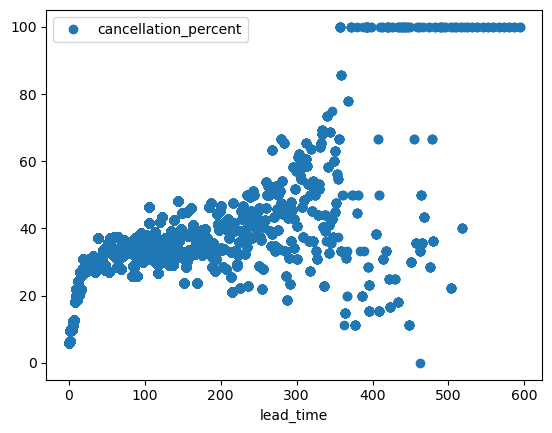

In [227]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_hotel.plot(x = 'lead_time', y='cancellation_rate',style='o') # The style option creates a scatterplot; without it, we only have lines. 
plt.show()

In [228]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_city = df_hotel['lead_time'].values.reshape(-1,1)
y_city = df_hotel['cancellation_rate'].values.reshape(-1,1)

In [229]:
# Split data into a training set and a test set.

X_train_city, X_test_city, y_train_city, y_test_city = train_test_split(X_city, y_city, test_size=0.3, random_state=0)

In [230]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [231]:
# Fit the regression object onto the training set.

regression.fit(X_train_city, y_train_city)

LinearRegression()

In [232]:
# Predict the values of y using X.

y_predicted_city = regression.predict(X_test_city)

In [234]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test_city, y_predicted_city) # This is the mean squared error
r2 = r2_score(y_test_city, y_predicted_city) # This is the R2 score. 

In [235]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.09720136]]
Mean squared error:  71.67318292550078
R2 score:  0.4642692002611062


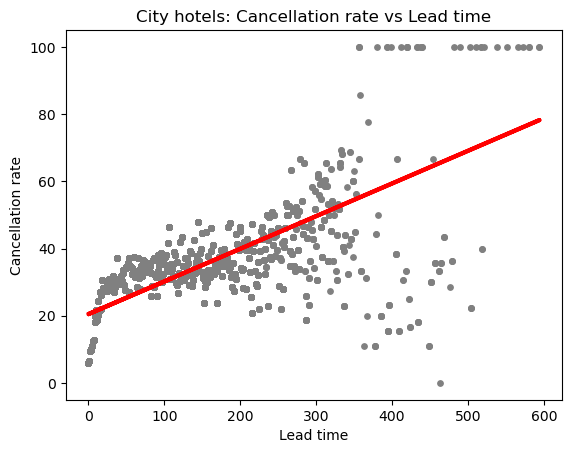

In [258]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test_city, y_test_city, color='gray', s = 15)
plot_test.plot(X_test_city, y_predicted_city, color='red', linewidth =3)
plot_test.title('City hotels: Cancellation rate vs Lead time')
plot_test.xlabel('Lead time')
plot_test.ylabel('Cancellation rate')
plot_test.show()

#### The model built on city hotels df has a positive slope. It also has a lower MSE in comparison to the model built on entire df. The R2 score is only one point higher.

### Resort Hotel

In [259]:
# create a dataframe of only resort hotels

df_resort = df[df['hotel'] == 'Resort Hotel'] 

In [260]:
df_resort.head()

,hotel,is_canceled,lead_time,cancellation_percent,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,32.56,2015,July,27,1,0,0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,69,34.82,2015,July,27,1,0,0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,12.75,2015,July,27,1,0,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,20.26,2015,July,27,1,0,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,21.43,2015,July,27,1,0,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [261]:
df_resort.shape

(33896, 31)

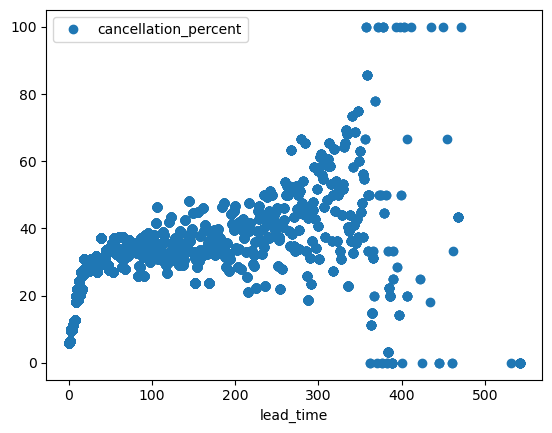

In [262]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_resort.plot(x = 'lead_time', y='cancellation_rate',style='o') # The style option creates a scatterplot; without it, we only have lines. 
plt.show()

In [263]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_resort = df_resort['lead_time'].values.reshape(-1,1)
y_resort = df_resort['cancellation_rate'].values.reshape(-1,1)

In [264]:
# Split data into a training set and a test set.

X_train_resort, X_test_resort, y_train_resort, y_test_resort = train_test_split(X_resort, y_resort, test_size=0.3, random_state=0)

In [265]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [266]:
# Fit the regression object onto the training set.

regression.fit(X_train_resort, y_train_resort)

LinearRegression()

In [267]:
# Predict the values of y using X.

y_predicted_resort = regression.predict(X_test_resort)

In [268]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test_resort, y_predicted_resort) # This is the mean squared error
r2 = r2_score(y_test_resort, y_predicted_resort) # This is the R2 score. 

In [269]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0939652]]
Mean squared error:  90.48397896706837
R2 score:  0.44817497578461185


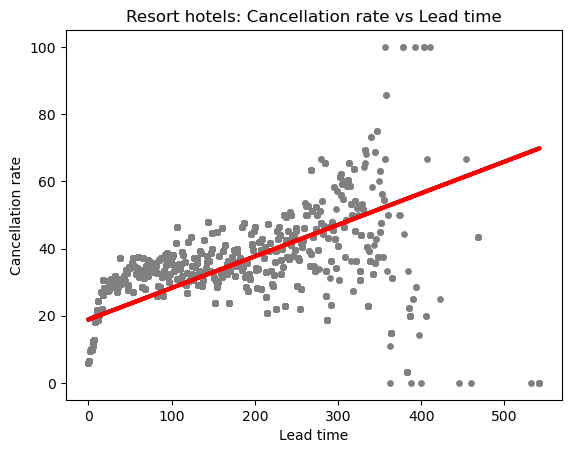

In [270]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test_resort, y_test_resort, color='gray', s = 15)
plot_test.plot(X_test_resort, y_predicted_resort, color='red', linewidth =3)
plot_test.title('Resort hotels: Cancellation rate vs Lead time')
plot_test.xlabel('Lead time')
plot_test.ylabel('Cancellation rate')
plot_test.show()

#### The model built on resort hotels df also has a positive slope. The MSE is quite high in comparison to the model built on entire df. The R2 score is only one point lower.

#### Comparing how the models performed for the following 2 dataframes - city hotel and resort hotel, it appears the city hotel model is relatively stronger than resort hotel, with a lower MSE and slightly higher R2 score. The summary statistics for city hotel model is quite similar to the entire df model.